# Import th∆∞ vi·ªán

In [1]:
import joblib as jlb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sbn

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# Import d·ªØ li·ªáu

In [7]:
# IRIS
data_iris = pd.read_excel('../../Data/Iris.xls')
print(data_iris.info(), '\n')
print("======================================================================")
print(data_iris.head(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None 

   sepallength  sepalwidth  petallength  petalwidth         iris
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa 



In [66]:
# Social_Network_Ads
data_sna = pd.read_csv('../../Data/Social_Network_Ads.csv')
print(data_sna.info(), '\n')
print("======================================================================")
print(data_sna.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            400 non-null    int64 
 1   Gender             400 non-null    object
 2   Age                400 non-null    int64 
 3   EstimatedSalary    400 non-null    int64 
 4   EstimatedSalary_K  400 non-null    int64 
 5   Purchased          400 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 18.9+ KB
None 

    User ID  Gender  Age  EstimatedSalary  EstimatedSalary_K  Purchased
0  15624510    Male   19            19000                 19          0
1  15810944    Male   35            20000                 20          0
2  15668575  Female   26            43000                 43          0
3  15603246  Female   27            57000                 57          0
4  15804002    Male   19            76000                 76          0


# Chu·∫©n b·ªã d·ªØ li·ªáu

### T·∫≠p d·ªØ li·ªáu IRIS

In [59]:
x_iris = data_iris.drop('iris', axis=1)
print(x_iris.head())

   sepallength  sepalwidth  petallength  petalwidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2


In [60]:
y_iris = data_iris['iris']
# y = data_iris.iris
print(y_iris.head())

print("==================================================================")

print("C√°c nh√£n (classes):", y_iris.unique())

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: iris, dtype: object
C√°c nh√£n (classes): ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


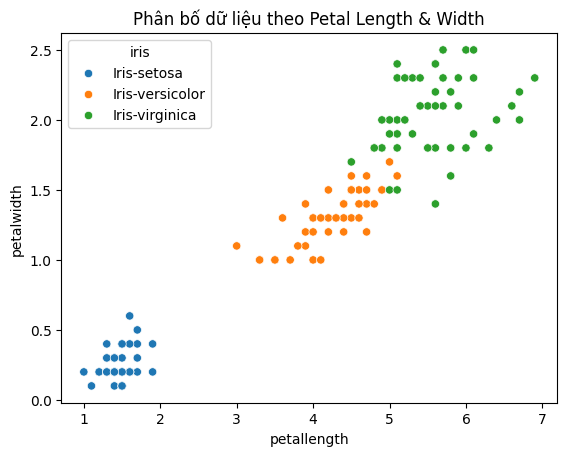

In [64]:
# Bi·ªÉu di·ªÖn tr·ª±c quan
sbn.scatterplot(x='petallength', y='petalwidth', data=data_iris, hue='iris')
plt.title("Ph√¢n b·ªë d·ªØ li·ªáu theo Petal Length & Width")
plt.show()

### T·∫≠p d·ªØ li·ªáu Social Network Ads

In [67]:
x_sna = data_sna.drop(['User ID', 'EstimatedSalary_K', 'Purchased'], axis = 1)
x_sna.head()

Gender  Age  EstimatedSalary
0    Male   19            19000
1    Male   35            20000
2  Female   26            43000
3  Female   27            57000
4    Male   19            76000

In [68]:
y_sna = data_sna.Purchased
print(y_sna.head())

print("==================================================================")

print("C√°c nh√£n (classes):", y_sna.unique())

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64
C√°c nh√£n (classes): [0 1]


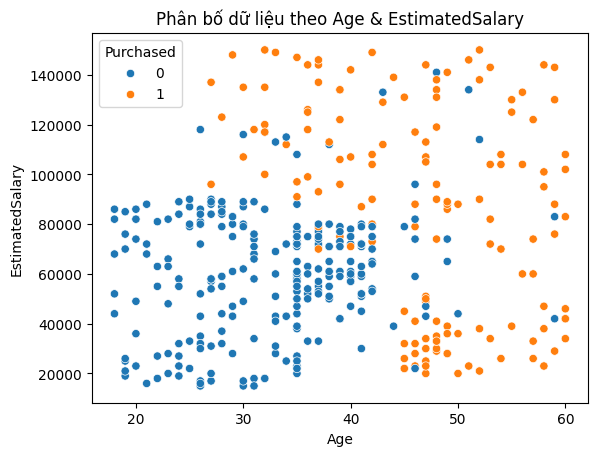

In [76]:
# Bi·ªÉu di·ªÖn tr·ª±c quan
sbn.scatterplot(x='Age', y='EstimatedSalary', data=data_sna, hue='Purchased')
plt.title("Ph√¢n b·ªë d·ªØ li·ªáu theo Age & EstimatedSalary")
plt.show()

In [77]:
## Chuy·ªÉn Gender th√†nh ki·ªÉu Numerical
sex = {'Male':1, 'Female':0}
x_sna['Male'] = [sex[i] for i in data_sna.Gender]
x_sna  = x_sna.drop(['Gender'], axis = 1)

print(pd.concat([x_sna, y_sna], axis = 1).head())

   Age  EstimatedSalary  Male  Purchased
0   19            19000     1          0
1   35            20000     1          0
2   26            43000     0          0
3   27            57000     0          0
4   19            76000     1          0


# Chia d·ªØ li·ªáu Train / Test (80 / 20)

In [ ]:
x_iris_train, x_iris_test, y_iris_train, y_iris_test = train_test_split(
    x_iris, y_iris, test_size=0.2, random_state=1, stratify=y_iris
)

print(f"Training size: {x_iris_train.shape[0]}, Test size: {x_iris_test.shape[0]}")

Training size: 120, Test size: 30


In [78]:
x_sna_train, x_sna_test, y_sna_train, y_sna_test = train_test_split(
    x_sna, y_sna, test_size=0.2, random_state=1, stratify=y_sna
)

print(f"Training size: {x_sna_train.shape[0]}, Test size: {x_sna_test.shape[0]}")

Training size: 320, Test size: 80


# Ch·ªçn K

In [33]:
# C√°ch 1: C√¥ng th·ª©c: int(sqrt(n) / 2)
k_iris_1 = int(pow(x_iris_train.shape[0], 1/2) / 2)
print(f"S·ªë l∆∞·ª£ng l√¢n c·∫≠n (k) ƒë∆∞·ª£c ch·ªçn = {k_iris_1}")

S·ªë l∆∞·ª£ng l√¢n c·∫≠n (k) ƒë∆∞·ª£c ch·ªçn = 5


In [79]:
k_sna_1 = int(pow(x_sna_train.shape[0], 1/2) / 2)
print(f"Gi√° tr·ªã k ƒë∆∞·ª£c ch·ªçn = {k_sna_1}")

Gi√° tr·ªã k ƒë∆∞·ª£c ch·ªçn = 8


# X√¢y d·ª±ng m√¥ h√¨nh kNN

In [34]:
knn_iris = KNeighborsClassifier(n_neighbors=k_iris_1)
knn_iris.fit(x_iris_train, y_iris_train)

KNeighborsClassifier()

In [80]:
knn_sna = KNeighborsClassifier(n_neighbors=k_sna_1)
knn_sna.fit(x_sna_train, y_sna_train)

KNeighborsClassifier(n_neighbors=8)

# L∆∞u m√¥ h√¨nh

In [ ]:
output_path = '../Output/kNN_Iris.pkl'
jlb.dump(knn_iris, output_path)
print(f"‚úÖ ƒê√£ l∆∞u m√¥ h√¨nh t·∫°i: {output_path}")

‚úÖ ƒê√£ l∆∞u m√¥ h√¨nh t·∫°i: ../Output/kNN_Iris.pkl


In [81]:
output_path_sna = '../Output/kNN_Sna.pkl'
jlb.dump(knn_sna, output_path_sna)
print(f"‚úÖ ƒê√£ l∆∞u m√¥ h√¨nh t·∫°i: {output_path_sna}")

‚úÖ ƒê√£ l∆∞u m√¥ h√¨nh t·∫°i: ../Output/kNN_Sna.pkl


# D·ª± ƒëo√°n v√† ki·ªÉm th·ª≠

In [46]:
model = jlb.load(output_path)
y_iris_pred = model.predict(x_iris_test)

In [82]:
model_sna = jlb.load(output_path_sna)
y_sna_pred = model_sna.predict(x_sna_test)

# So s√°nh k·∫øt qu·∫£

In [49]:
df_compare = pd.DataFrame({'Th·ª±c t·∫ø': y_iris_test.values, 'D·ª± ƒëo√°n': y_iris_pred})
print(df_compare.head(10))

print(f"\nS·ªë tr∆∞·ªùng h·ª£p d·ª± ƒëo√°n ƒê√öNG: {(y_iris_pred == y_iris_test).sum()}/{len(y_iris_test)}")

           Th·ª±c t·∫ø          D·ª± ƒëo√°n
0      Iris-setosa      Iris-setosa
1  Iris-versicolor  Iris-versicolor
2  Iris-versicolor  Iris-versicolor
3      Iris-setosa      Iris-setosa
4   Iris-virginica   Iris-virginica
5  Iris-versicolor  Iris-versicolor
6   Iris-virginica   Iris-virginica
7      Iris-setosa      Iris-setosa
8      Iris-setosa      Iris-setosa
9   Iris-virginica   Iris-virginica

S·ªë tr∆∞·ªùng h·ª£p d·ª± ƒëo√°n ƒê√öNG: 30/30


In [83]:
df_compare_sna = pd.DataFrame({'Th·ª±c t·∫ø': y_sna_test.values, 'D·ª± ƒëo√°n': y_sna_pred})
print(df_compare_sna.head(10))

print(f"\nS·ªë tr∆∞·ªùng h·ª£p d·ª± ƒëo√°n ƒê√öNG: {(y_sna_pred == y_sna_test).sum()}/{len(y_sna_test)}")

   Th·ª±c t·∫ø  D·ª± ƒëo√°n
0        0        0
1        0        1
2        0        0
3        0        0
4        0        0
5        1        1
6        0        0
7        1        1
8        1        0
9        1        0

S·ªë tr∆∞·ªùng h·ª£p d·ª± ƒëo√°n ƒê√öNG: 66/80


# ƒê√°nh gi√° m√¥ hinh

In [38]:
def classification_eval(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision (macro)': precision_score(y_true, y_pred, average='macro'),
        'Recall (macro)': recall_score(y_true, y_pred, average='macro'),
        'F1-score (macro)': f1_score(y_true, y_pred, average='macro')
    }

scores = classification_eval(y_iris_test, y_iris_pred)

print("\n=== üîç ƒê√ÅNH GI√Å M√î H√åNH ===")
for metric, value in scores.items():
    print(f"{metric:20s}: {value*100:.2f}%")

print("\n=== üìä B√ÅO C√ÅO CHI TI·∫æT ===")
print(classification_report(y_iris_test, y_iris_pred))


=== üîç ƒê√ÅNH GI√Å M√î H√åNH ===
Accuracy            : 96.67%
Precision (macro)   : 96.97%
Recall (macro)      : 96.67%
F1-score (macro)    : 96.66%

=== üìä B√ÅO C√ÅO CHI TI·∫æT ===
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [48]:
# Ma tr·∫≠n nh·∫ßm l·∫´n
cm = confusion_matrix(y_iris_test, y_iris_pred)
print("\n=== üî¢ Ma tr·∫≠n nh·∫ßm l·∫´n ===")
print(cm)


=== üî¢ Ma tr·∫≠n nh·∫ßm l·∫´n ===
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


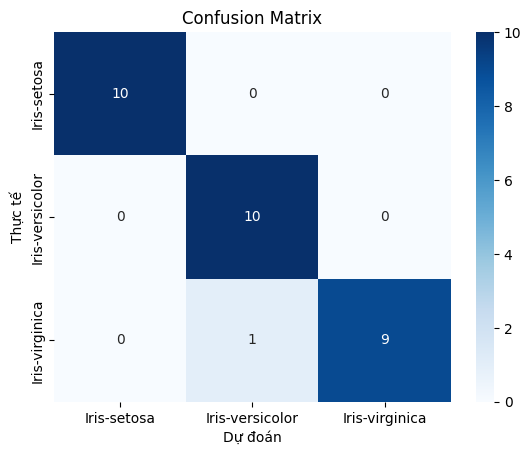

In [40]:
# Hi·ªÉn th·ªã tr·ª±c quan ma tr·∫≠n
sbn.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=y_iris.unique(), yticklabels=y_iris.unique())
plt.title('Confusion Matrix')
plt.xlabel('D·ª± ƒëo√°n')
plt.ylabel('Th·ª±c t·∫ø')
plt.show()

In [84]:
def classification_eval_sna(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-score': f1_score(y_true, y_pred)
    }

scores_sna = classification_eval_sna(y_sna_test, y_sna_pred)

print("\n=== üîç ƒê√ÅNH GI√Å M√î H√åNH ===")
for metric, value in scores_sna.items():
    print(f"{metric:15s}: {value*100:.2f}%")

print("\n=== üìä B√ÅO C√ÅO CHI TI·∫æT ===")
print(classification_report(y_sna_test, y_sna_pred, target_names=["KH√îNG MUA", "MUA"]))


=== üîç ƒê√ÅNH GI√Å M√î H√åNH ===
Accuracy       : 82.50%
Precision      : 80.00%
Recall         : 68.97%
F1-score       : 74.07%

=== üìä B√ÅO C√ÅO CHI TI·∫æT ===
              precision    recall  f1-score   support

   KH√îNG MUA       0.84      0.90      0.87        51
         MUA       0.80      0.69      0.74        29

    accuracy                           0.82        80
   macro avg       0.82      0.80      0.80        80
weighted avg       0.82      0.82      0.82        80



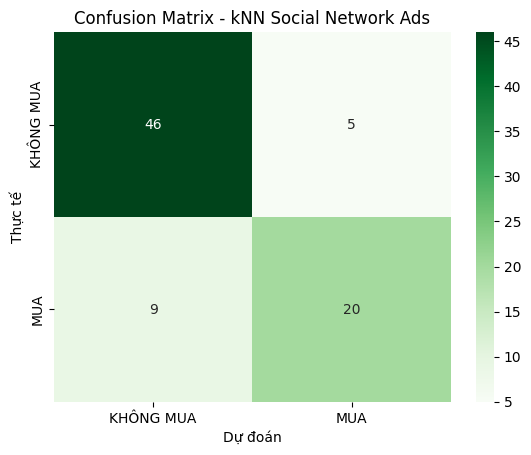

In [85]:
# Ma tr·∫≠n nh·∫ßm l·∫´n
cm_sna = confusion_matrix(y_sna_test, y_sna_pred)
sbn.heatmap(cm_sna, annot=True, fmt='d', cmap='Greens',
            xticklabels=["KH√îNG MUA", "MUA"],
            yticklabels=["KH√îNG MUA", "MUA"])
plt.title("Confusion Matrix - kNN Social Network Ads")
plt.xlabel("D·ª± ƒëo√°n")
plt.ylabel("Th·ª±c t·∫ø")
plt.show()

# D·ª± ƒëo√°n

In [41]:
while True:
    try:
        idx = int(input(f"Nh·∫≠p ch·ªâ s·ªë d√≤ng (0 ‚Üí {len(x_iris_test)-1}) ho·∫∑c -1 ƒë·ªÉ tho√°t: "))
        if idx == -1:
            break
        if 0 <= idx < len(x_iris_test):
            x_new = x_iris_test.iloc[[idx]]
            y_hat = model.predict(x_new)[0]
            print(f"M·∫´u {idx}: \n{x_new.to_string(index=False)}")
            print(f"üëâ D·ª± ƒëo√°n: {y_hat}\n")
        else:
            print("‚ùå Ch·ªâ s·ªë kh√¥ng h·ª£p l·ªá.")
    except ValueError:
        print("‚ùå Vui l√≤ng nh·∫≠p s·ªë nguy√™n h·ª£p l·ªá.")

M·∫´u 15: 
 sepallength  sepalwidth  petallength  petalwidth
         5.7         4.4          1.5         0.4
üëâ D·ª± ƒëo√°n: Iris-setosa

M·∫´u 10: 
 sepallength  sepalwidth  petallength  petalwidth
         5.4         3.9          1.3         0.4
üëâ D·ª± ƒëo√°n: Iris-setosa

‚ùå Ch·ªâ s·ªë kh√¥ng h·ª£p l·ªá.
M·∫´u 21: 
 sepallength  sepalwidth  petallength  petalwidth
         5.6         3.0          4.5         1.5
üëâ D·ª± ƒëo√°n: Iris-versicolor



In [89]:
labels_sna = np.array(['KH√îNG mua', 'MUA'])

while True:
    try:
        idx = int(input(f"Nh·∫≠p ch·ªâ s·ªë d√≤ng (0 ‚Üí {len(x_sna_test)-1}) ho·∫∑c -1 ƒë·ªÉ tho√°t: "))
        if idx == -1:
            break
        if 0 <= idx < len(x_sna_test):
            x_new = x_sna_test.iloc[[idx]]
            y_hat = model_sna.predict(x_new)[0]
            print(f"\nM·∫´u {x_new.to_string()}:\n{x_new.to_string(index=False)}")
            print(f"üëâ D·ª± ƒëo√°n: {labels_sna[y_hat]}\n")
        else:
            print("‚ùå Ch·ªâ s·ªë kh√¥ng h·ª£p l·ªá.")
    except ValueError:
        print("‚ùå Vui l√≤ng nh·∫≠p s·ªë h·ª£p l·ªá.")


M·∫´u    Age  EstimatedSalary  Male
7   32           150000     0:
 Age  EstimatedSalary  Male
  32           150000     0
üëâ D·ª± ƒëo√°n: MUA

